In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

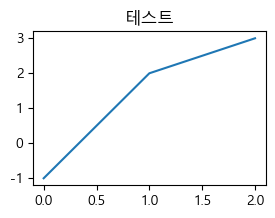

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(12,5))

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 준비

*  행정안전부
    * https://www.mois.go.kr/<br>
    * 정책자료 > 주민등록인구통계>연령별 인구 현황
        * 성별구분하지않음
        * 1세단위
        * 0~100세이상
        * 전체읍면동 현황

In [3]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------

data_file = 'data/202503_202503_연령별인구현황_월간.csv'
df_all = pd.read_csv(data_file, encoding='cp949', thousands=',')

In [4]:
df_all.head()

,행정구역,2025년03월_계_총인구수,2025년03월_계_연령구간인구수,2025년03월_계_0세,2025년03월_계_1세,2025년03월_계_2세,2025년03월_계_3세,2025년03월_계_4세,2025년03월_계_5세,2025년03월_계_6세,...,2025년03월_계_91세,2025년03월_계_92세,2025년03월_계_93세,2025년03월_계_94세,2025년03월_계_95세,2025년03월_계_96세,2025년03월_계_97세,2025년03월_계_98세,2025년03월_계_99세,2025년03월_계_100세 이상
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,10166,7861,5973,4303,3532,2592,1807,1185,635,1506
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,230,180,131,98,59,73,34,37,14,43
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,22,15,11,10,3,7,1,3,1,4
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,19,13,12,7,8,11,3,2,1,7
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,7,6,4,4,3,0,1,1,0,0


In [6]:
# ------------------------
# 컬럼명 변경
#   [ 행정구역, 총인구수, 연령구간인구수, 0세, 1세, ... , 100세이상]
#   split('_')
# ------------------------

df_all.columns = df_all.columns.str.split('_').str[-1]
df_all.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세',
       '100세 이상'],
      dtype='object', length=104)

In [8]:
# ------------------------
# 파생컬럼 추가
#   행정구역명 컬럼 추가
# ------------------------

df_all['행정구역명'] = df_all['행정구역'].str.split(' ').str[0]
df_all

,행정구역,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
0,서울특별시 (1100000000),9335734,9335734,40432,37092,39575,41936,42838,45904,49637,...,7861,5973,4303,3532,2592,1807,1185,635,1506,서울특별시
1,서울특별시 종로구 (1111000000),138184,138184,425,395,440,467,476,524,521,...,180,131,98,59,73,34,37,14,43,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),10986,10986,40,44,43,41,51,45,47,...,15,11,10,3,7,1,3,1,4,서울특별시
3,서울특별시 종로구 사직동(1111053000),8937,8937,30,21,34,37,28,39,40,...,13,12,7,8,11,3,2,1,7,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2189,2189,7,7,5,7,6,6,5,...,6,4,4,3,0,1,1,0,0,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),11088,11088,61,68,76,98,84,107,109,...,9,10,2,5,5,3,0,1,1,제주특별자치도
3906,제주특별자치도 서귀포시 대륜동(5013059000),15038,15038,80,88,103,129,105,141,127,...,23,8,11,5,5,4,1,1,6,제주특별자치도
3907,제주특별자치도 서귀포시 대천동(5013060000),13672,13672,87,93,106,105,124,120,135,...,16,9,8,7,2,3,2,1,1,제주특별자치도
3908,제주특별자치도 서귀포시 중문동(5013061000),12122,12122,61,57,64,82,74,87,100,...,16,10,17,5,7,3,3,2,2,제주특별자치도


In [ ]:
# ------------------------
# 컬럼 삭제
#   - ['총인구수', '연령구간인구수']
# ------------------------

df_all.drop(['총인구수', '연령구간인구수'], axis=1, inplace=True)


KeyError: "['총인구수', '연령구간인구수'] not found in axis"

## 행정구역 - 연령별 인구구조

#### 데이터 준비

In [9]:
# ------------------------
# 행정구역 단위 연령별 데이터 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

cond = df_all['행정구역'].str[-9:-1]=='00000000'
df_region1 = df_all[cond].copy()

In [10]:
# ------------------------
# 행정구역명 컬럼을 인덱스로 지정
# ------------------------

df_region1.set_index('행정구역명',inplace=True)

In [11]:
# ------------------------
# 행정구역 컬럼을 삭제
# ------------------------
df_region1.drop('행정구역', axis=1, inplace=True)

In [12]:
# ------------------------
# 행열 전치
# ------------------------

df_region1_t = df_region1.T

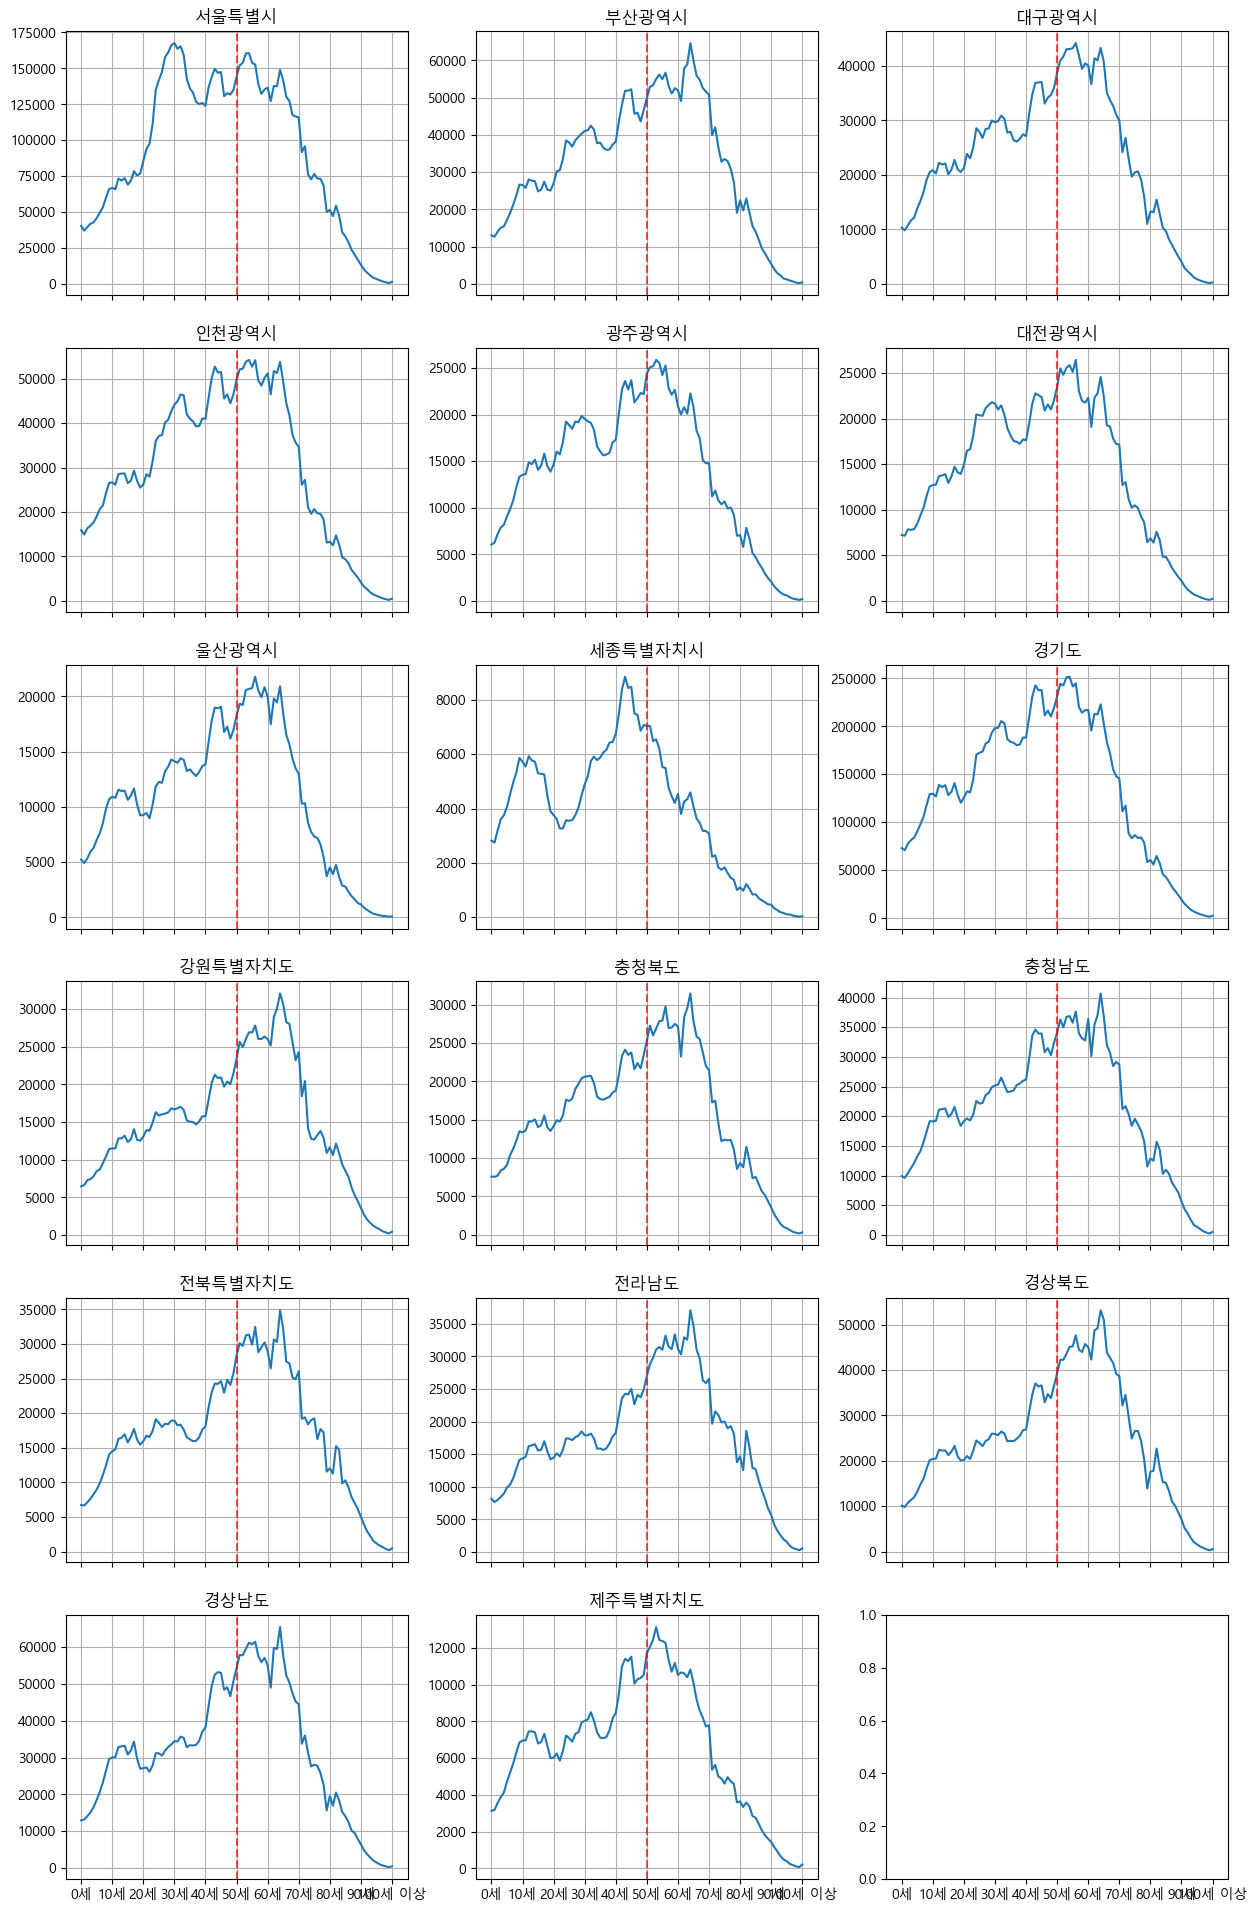

In [13]:
# ---------------------
# 서브플롯
# ---------------------

fig, axes = plt.subplots(6,3, 
                         figsize=(15,24), 
                         sharex=True)

axes_flat = axes.flatten()
for i, region in enumerate(df_region1_t):
    axes_flat[i].plot(df_region1_t[region])
    axes_flat[i].set_title(region)
    axes_flat[i].axvline(x=50, color='r', linestyle='--', alpha=0.7)
    axes_flat[i].grid(True)
   
plt.xticks(range(0, 101, 10));


## 시군구-연령별 인구구조

#### 데이터 준비

In [14]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

region_select = input('분석할 행정구역명 : ')
cond = df_all['행정구역명'].str.contains(region_select)
region_select = df_all.loc[cond, '행정구역명'].drop_duplicates()
region_select = region_select.iloc[0]

print('분석할 행정구역명 : ', region_select)



분석할 행정구역명 :  서울특별시


In [15]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------

cond1 = df_all['행정구역명'] == region_select
cond2 = df_all['행정구역'].str[-7:-1] == '000000'
cond3 = df_all['행정구역'].str[-9:-1] != '00000000'

df_region2 = df_all[cond1 & cond2 & cond3].copy()
df_region2



,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명
1,서울특별시 종로구 (1111000000),425,395,440,467,476,524,521,599,703,...,180,131,98,59,73,34,37,14,43,서울특별시
19,서울특별시 중구 (1114000000),572,436,484,502,518,492,490,516,581,...,141,105,82,71,51,44,25,6,21,서울특별시
35,서울특별시 용산구 (1117000000),1007,848,954,936,962,1039,987,1040,1123,...,205,205,122,104,77,50,33,19,54,서울특별시
52,서울특별시 성동구 (1120000000),1616,1383,1438,1593,1500,1575,1538,1616,1765,...,238,160,116,97,74,44,34,12,35,서울특별시
86,서울특별시 동대문구 (1123000000),1513,1449,1577,1532,1653,1761,1747,1888,2007,...,298,207,155,130,95,57,39,18,51,서울특별시
101,서울특별시 중랑구 (1126000000),1609,1526,1625,1566,1455,1652,1739,1840,2056,...,345,228,185,128,102,74,43,21,65,서울특별시
118,서울특별시 성북구 (1129000000),1703,1700,1790,1883,1980,2085,2342,2440,2853,...,370,311,218,166,138,82,60,33,73,서울특별시
153,서울특별시 도봉구 (1132000000),990,926,1006,1153,1053,1256,1277,1476,1610,...,346,250,168,155,106,74,54,23,60,서울특별시
168,서울특별시 노원구 (1135000000),2033,1902,1937,1999,2036,2194,2393,2707,3162,...,499,369,289,221,151,118,77,39,92,서울특별시
188,서울특별시 은평구 (1138000000),1827,1703,1831,1862,1962,2072,2182,2361,2714,...,380,304,214,176,121,101,53,35,71,서울특별시


In [16]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------

df_region2['시군구명'] = df_region2['행정구역'].str.split(' ').str[1]
df_region2

,행정구역,0세,1세,2세,3세,4세,5세,6세,7세,8세,...,93세,94세,95세,96세,97세,98세,99세,100세 이상,행정구역명,시군구명
1,서울특별시 종로구 (1111000000),425,395,440,467,476,524,521,599,703,...,131,98,59,73,34,37,14,43,서울특별시,종로구
19,서울특별시 중구 (1114000000),572,436,484,502,518,492,490,516,581,...,105,82,71,51,44,25,6,21,서울특별시,중구
35,서울특별시 용산구 (1117000000),1007,848,954,936,962,1039,987,1040,1123,...,205,122,104,77,50,33,19,54,서울특별시,용산구
52,서울특별시 성동구 (1120000000),1616,1383,1438,1593,1500,1575,1538,1616,1765,...,160,116,97,74,44,34,12,35,서울특별시,성동구
86,서울특별시 동대문구 (1123000000),1513,1449,1577,1532,1653,1761,1747,1888,2007,...,207,155,130,95,57,39,18,51,서울특별시,동대문구
101,서울특별시 중랑구 (1126000000),1609,1526,1625,1566,1455,1652,1739,1840,2056,...,228,185,128,102,74,43,21,65,서울특별시,중랑구
118,서울특별시 성북구 (1129000000),1703,1700,1790,1883,1980,2085,2342,2440,2853,...,311,218,166,138,82,60,33,73,서울특별시,성북구
153,서울특별시 도봉구 (1132000000),990,926,1006,1153,1053,1256,1277,1476,1610,...,250,168,155,106,74,54,23,60,서울특별시,도봉구
168,서울특별시 노원구 (1135000000),2033,1902,1937,1999,2036,2194,2393,2707,3162,...,369,289,221,151,118,77,39,92,서울특별시,노원구
188,서울특별시 은평구 (1138000000),1827,1703,1831,1862,1962,2072,2182,2361,2714,...,304,214,176,121,101,53,35,71,서울특별시,은평구


In [17]:
# ------------------------
# 시군구명 컬럼을 인덱스로 지정
# ------------------------

df_region2.set_index('시군구명',inplace=True)

In [18]:
# ------------------------
# ['행정구역', '행정구역명'] 칼럼 삭제
# ------------------------

df_region2.drop(['행정구역', '행정구역명'], axis=1, inplace=True)

In [19]:
# ------------------------
# 행렬 전치
# ------------------------
df_region2_t = df_region2.T

#### 시각화

In [20]:
# ----------------
# 시군구 갯수(서브플롯 갯수)
# ----------------
axes_cnt = df_region2_t.shape[1]

# ----------------
# 서브플롯 행의 갯수
# ----------------
row_cnt = axes_cnt // 3 + 1 if axes_cnt % 3 else axes_cnt // 3

# ----------------
# 서브플롯 세로 크기
# ----------------
fig_height = row_cnt * 4

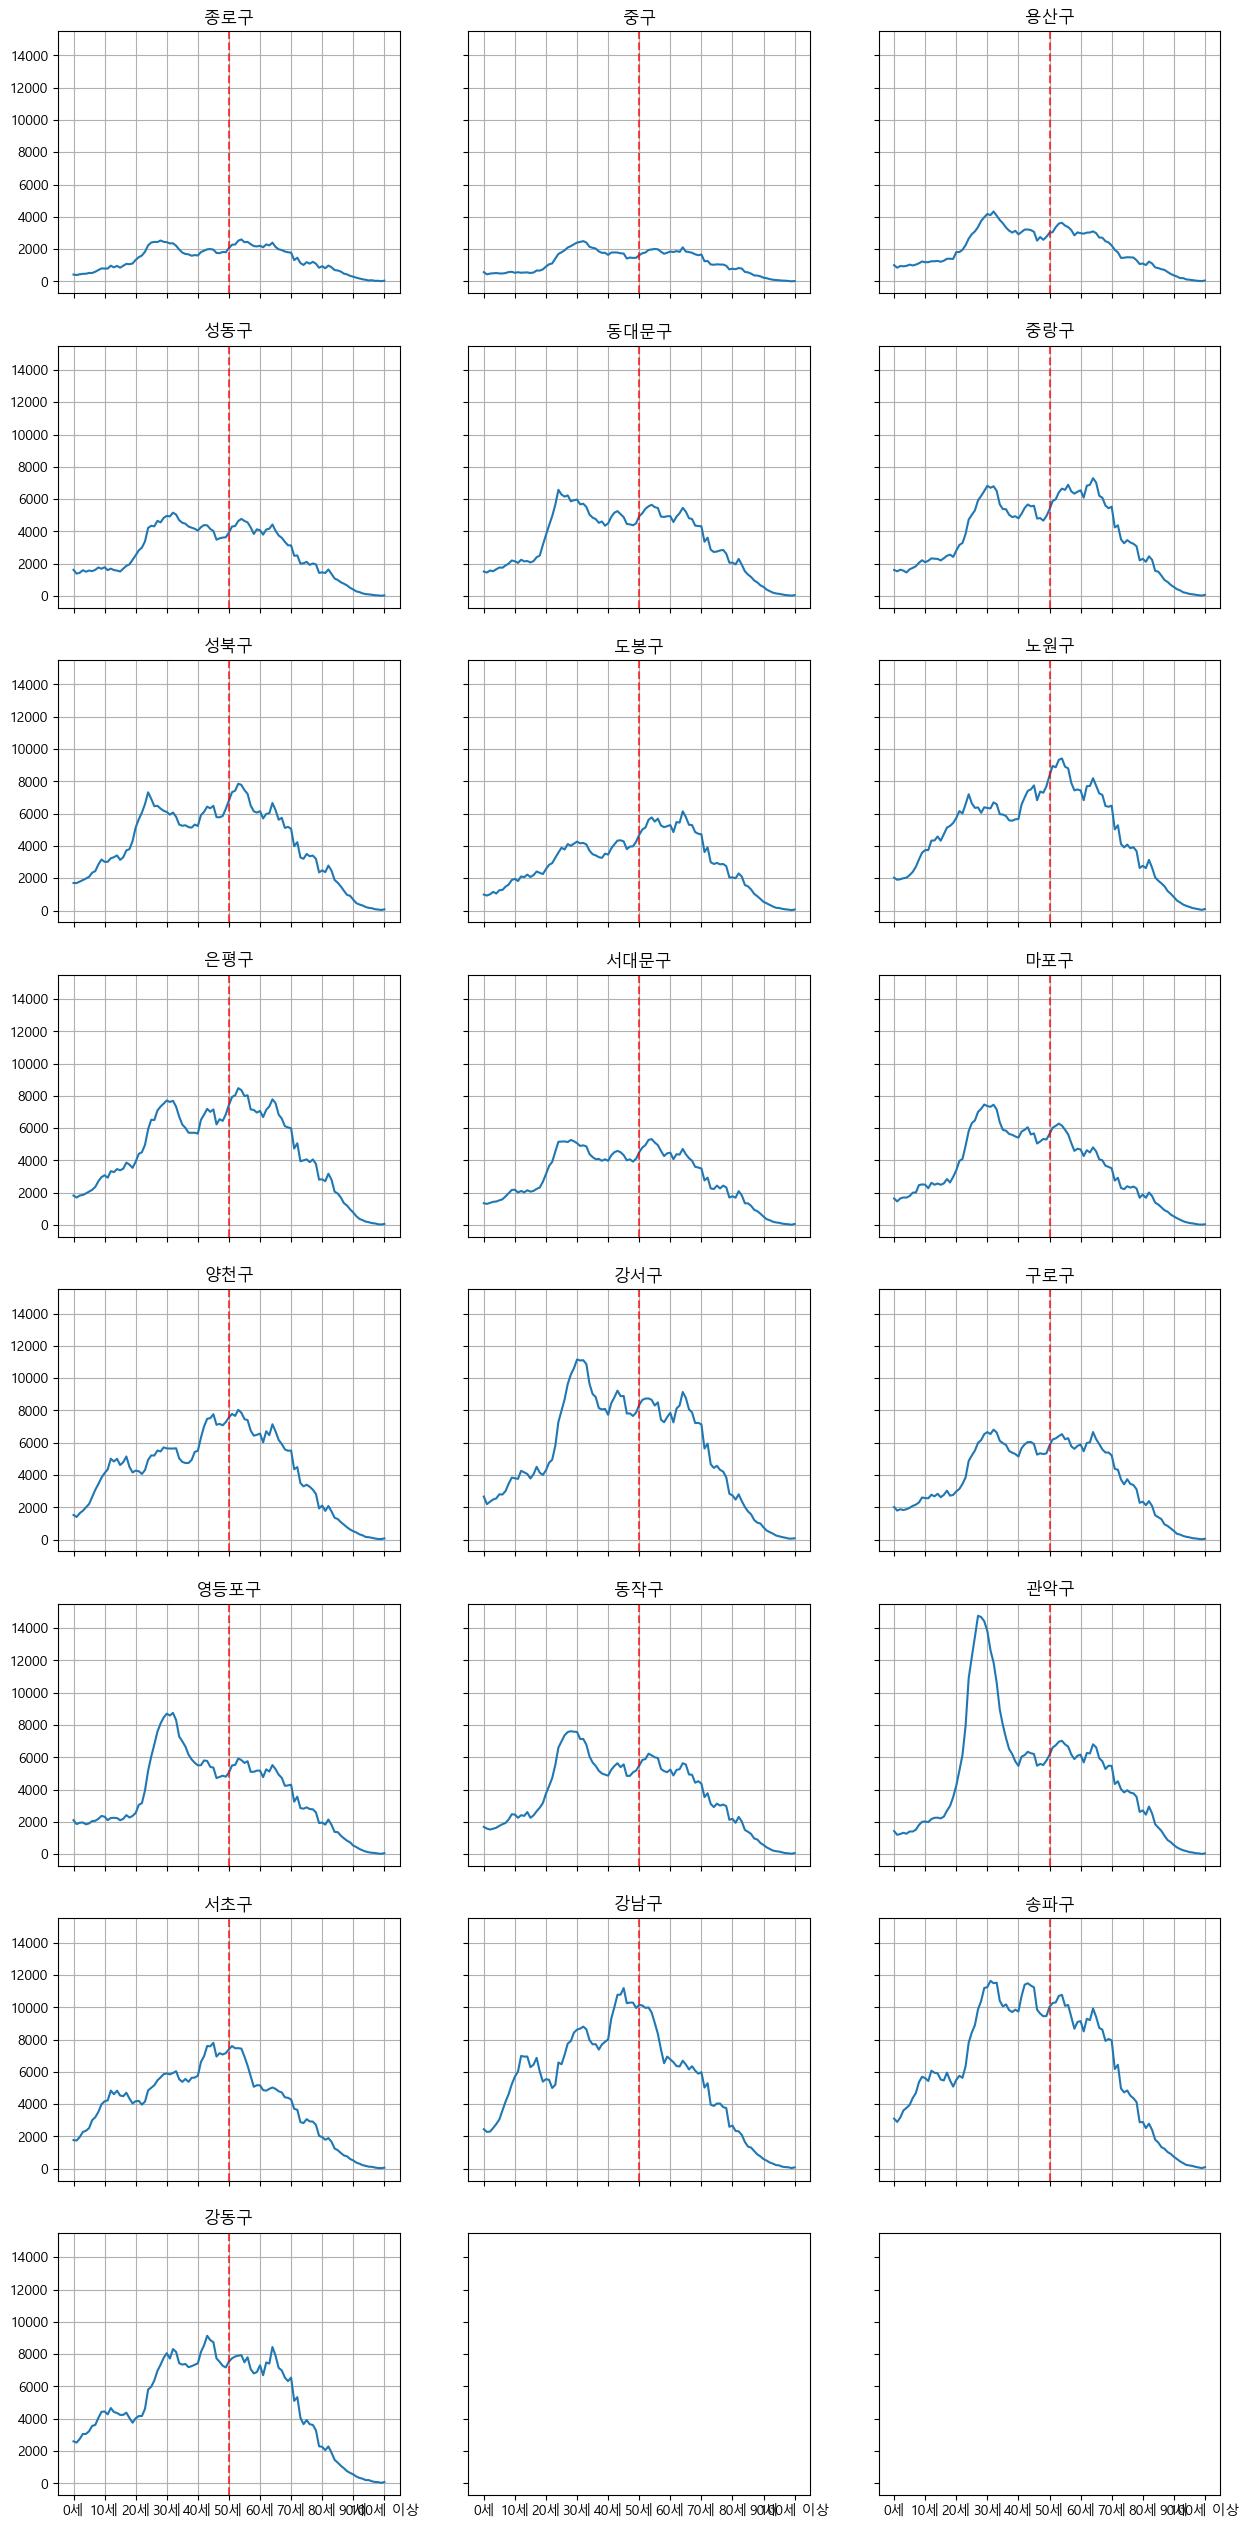

In [21]:
# ---------------------
# 서브플롯
# ---------------------


fig, axes = plt.subplots(row_cnt,3, 
                         figsize=(15,fig_height), 
                         sharex=True,
                         sharey=True)

axes_flat = axes.flatten()
for i, region in enumerate(df_region2_t):
    axes_flat[i].plot(df_region2_t[region])
    axes_flat[i].set_title(region)
    axes_flat[i].axvline(x=50, color='r', linestyle='--', alpha=0.7)
    axes_flat[i].grid(True)
   
plt.xticks(range(0, 101, 10));
